In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from timeit import default_timer as timer
from matplotlib.axis import Axis
from tabulate import tabulate

In [2]:
np.random.seed(1000)
A = np.random.randn(1000,10)

In [3]:
x_bar = np.zeros(10)
x_bar = x_bar.reshape(10,1)

np.random.seed(10)

for i in range(0,10,2):
  x_bar[i] = np.random.uniform(-i-2,-i-1)
for j in range(1,10,2):
  x_bar[j] = np.random.uniform(j+1,j+2)

In [4]:
np.random.seed(1000)
ep = np.random.randn(1000,1)

In [5]:
y = np.matmul(A,x_bar) + ep

**Q 1**

Regularized least squares is used when the learned model suffers from poor generalization due to high influence of A. Regularized least squares can be used in such cases to improve the generalizability of the model. In this problem by doing this we will get optimal x which will not be highly influenced by A.

In [6]:
def evalf(x,lamda):
  assert type(x) is np.ndarray
  fx = np.linalg.norm(np.matmul(A,x) - y)
  fx = 0.5*(fx)**2 + 0.5*lamda*np.matmul(x.T,x)

  return fx

In [7]:
def evalg(x,lamda):
  assert type(x) is np.ndarray

  return np.matmul(A.T, np.matmul(A, x) - y) + lamda*x

In [8]:
def evalh(x,lamda):
  assert type(x) is np.ndarray

  return np.matmul(A.T,A) + lamda*np.identity(10)

In [9]:
def compute_steplength_backtracking_scaled_direction(x, gradf, lamda, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(direction) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  
  alpha = alpha_start
  while evalf(x+alpha*direction, lamda)>evalf(x, lamda)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [10]:
def find_minimizer_newtons(start_x, tol, lamda, *args):
  assert type(start_x) is np.ndarray 
  assert type(tol) is float and tol>=0 

  x = start_x
  n = x.shape[0]
  g_x = evalg(x, lamda)

  x_k_list =[]

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(x, lamda))
    p_k = -np.matmul(D_k, g_x)
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, lamda, p_k, alpha_start, rho, gamma)
  
    x = np.add(x,np.multiply(step_length,p_k))
    x_k_list.append(x)
    k += 1 
    g_x = evalg(x, lamda)
  return x, evalf(x,lamda), k, x_k_list

In [11]:
lamda_list = [1e-3,1e-2, 0.1, 1]

**Q 4**

In [12]:
minimizers_for_lam1 = {}
no_of_iter_for_lam1 = {}
x_k_for_lam1 = {}
time_for_lamda1 ={}

for lam in lamda_list:
  time_start1 = timer()
  minimizer1,fn1,iter1, x_k_list1 = find_minimizer_newtons(np.zeros(10).reshape(10,1), 1e-5, lam, 0.99, 0.5, 0.5)
  time_end1   = timer()

  minimizers_for_lam1[lam] = minimizer1
  no_of_iter_for_lam1[lam] = iter1
  x_k_for_lam1[lam] = x_k_list1
  time_for_lamda1[lam] = time_end1-time_start1

In [13]:
styl_list=["bv-", "g^--", "r<-.", "c>:"]
styl_dict = {}
for j in range(4):
  styl_dict[lamda_list[j]] = styl_list[j]

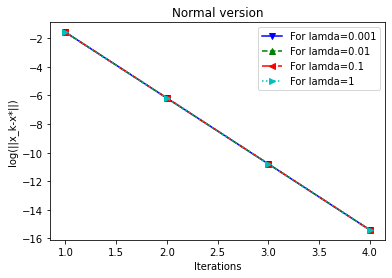

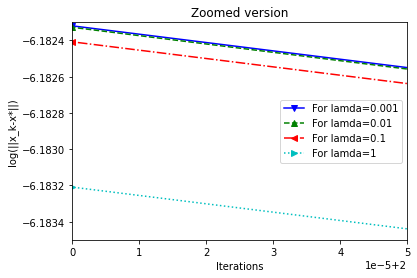

In [14]:
for i in lamda_list:
  plt.plot([k+1 for k in range(no_of_iter_for_lam1[i]-1)], [math.log(np.linalg.norm(x_k_for_lam1[i][j]-minimizers_for_lam1[i])) for j in range(no_of_iter_for_lam1[i]-1)], styl_dict[i])
plt.xlabel('Iterations')
plt.ylabel('log(||x_k-x*||)')
plt.title('Normal version')
plt.legend(['For lamda=0.001','For lamda=0.01','For lamda=0.1','For lamda=1'])

fig, ax = plt.subplots()
for i in lamda_list:
  ax.plot([k+1 for k in range(no_of_iter_for_lam1[i]-1)], [math.log(np.linalg.norm(x_k_for_lam1[i][j]-minimizers_for_lam1[i])) for j in range(no_of_iter_for_lam1[i]-1)], styl_dict[i])

plt.xlim([2, 2.00005])
plt.ylim([-6.1835, -6.1823])
plt.xlabel('Iterations')
plt.ylabel('log(||x_k-x*||)')
plt.legend(['For lamda=0.001','For lamda=0.01','For lamda=0.1','For lamda=1'])
plt.title('Zoomed version')

plt.show()

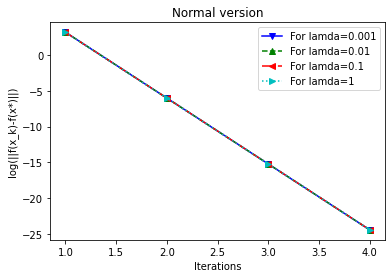

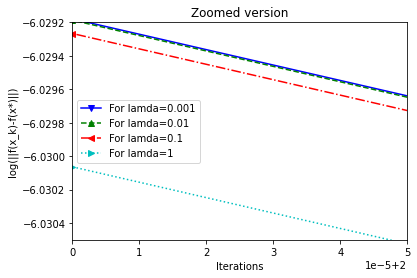

In [15]:
for i in lamda_list:
  plt.plot([k+1 for k in range(no_of_iter_for_lam1[i]-1)], [math.log(abs(evalf(x_k_for_lam1[i][j], i)-evalf(minimizers_for_lam1[i], i))) for j in range(no_of_iter_for_lam1[i]-1)], styl_dict[i])
plt.xlabel('Iterations')
plt.ylabel('log(||f(x_k)-f(x*)||)')
plt.legend(['For lamda=0.001','For lamda=0.01','For lamda=0.1','For lamda=1'])
plt.title('Normal version')

fig, ax = plt.subplots()
for i in lamda_list:
  ax.plot([k+1 for k in range(no_of_iter_for_lam1[i]-1)], [math.log(abs(evalf(x_k_for_lam1[i][j], i)-evalf(minimizers_for_lam1[i], i))) for j in range(no_of_iter_for_lam1[i]-1)], styl_dict[i])
plt.xlim([2, 2.00005]) 
plt.ylim([-6.03050, -6.0292])
plt.xlabel('Iterations')
plt.ylabel('log(||f(x_k)-f(x*)||)')
plt.title('Zoomed version')
plt.legend(['For lamda=0.001','For lamda=0.01','For lamda=0.1','For lamda=1'])

plt.show()

$\frac{||x^{k+1} − x^∗||}{||x^k − x^∗||}≤ r$

Taking log both sides we get $log(||x^{k+1} − x^∗||)-log(||x^{k} − x^∗||) < log(r)$, where 0<r<1.

The convergence rate for both is Q-Linear as the $log(||x^k - x^*||)$ is decreasing linearly wrt k and we can always get an 0<r<1 for all -ve numbers k s.t log(r) >= k 

Convergence rate is almost same for all the values of lambda.

**Q 5**

In [16]:
#code for BFGS method to find the minimizer
def find_minimizer_BFGS(start_x, tol, lamda, B_k, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  n = len(start_x)
  x = start_x.reshape((n,1))
  g_x = evalg(x, lamda)
  x_k_list=[]
  #initialization for backtracking line search
  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    p_k = -np.matmul(B_k, g_x)
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x,lamda, p_k, alpha_start, rho, gamma)

    x_k = x
    s_k = np.multiply(step_length,p_k)
    #x = np.add(x, np.multiply(step_length,p_k)) #update x = x + step_length*direction
    x = np.add(x, s_k)#s_k = x - x_k
    y_k = evalg(x,lamda)-evalg(x_k, lamda)
    s_yT = np.matmul(s_k,y_k.T)
    y_sT = np.matmul(y_k, s_k.T)
    u_k = 1/(np.matmul(y_k.T,s_k))
    term_11 = np.subtract(np.identity(n) , u_k*s_yT)
    term_13 = np.subtract(np.identity(n) , u_k*y_sT)
    B_k = np.matmul(term_11,np.matmul(B_k,term_13)) + u_k*np.matmul(s_k,s_k.T)
    
    x_k_list.append(x)
    k += 1 #increment iteration
    g_x = evalg(x, lamda) #compute gradient at new point

  return x, evalf(x, lamda), k, x_k_list

In [17]:
B_k = np.identity(10)/10

minimizers_for_lam2 = {}
no_of_iter_for_lam2 = {}
x_k_for_lam2 = {}
time_for_lamda2 ={}

for lam in lamda_list:
  time_start = timer()
  minimizer2,fn2,iter2, x_k_list2 = find_minimizer_BFGS(np.zeros(10).reshape(10,1), 1e-5, lam, B_k, 0.99, 0.5, 0.5)
  time_end   = timer()

  minimizers_for_lam2[lam] = minimizer2
  no_of_iter_for_lam2[lam] = iter2
  x_k_for_lam2[lam] = x_k_list2
  time_for_lamda2[lam] = time_end-time_start

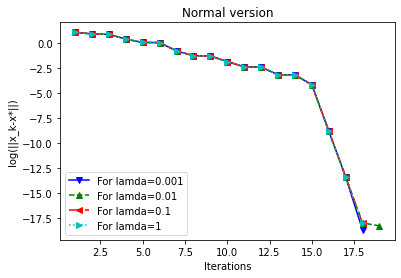

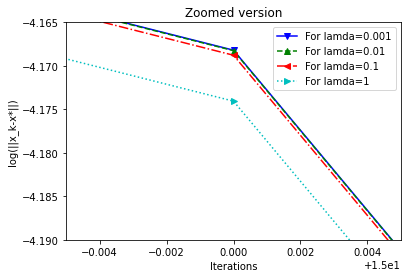

In [18]:
for i in lamda_list:
  plt.plot([k+1 for k in range(no_of_iter_for_lam2[i]-1)], [math.log(np.linalg.norm(x_k_for_lam2[i][j]-minimizers_for_lam2[i])) for j in range(no_of_iter_for_lam2[i]-1)], styl_dict[i])
plt.xlabel('Iterations')
plt.ylabel('log(||x_k-x*||)')
plt.title('Normal version')
plt.legend(['For lamda=0.001','For lamda=0.01','For lamda=0.1','For lamda=1'])

fig, ax = plt.subplots()
for i in lamda_list:
  ax.plot([k+1 for k in range(no_of_iter_for_lam2[i]-1)], [math.log(np.linalg.norm(x_k_for_lam2[i][j]-minimizers_for_lam2[i])) for j in range(no_of_iter_for_lam2[i]-1)], styl_dict[i])

plt.xlim([14.995, 15.005])
plt.ylim([-4.19, -4.165])
plt.xlabel('Iterations')
plt.ylabel('log(||x_k-x*||)')
plt.title('Zoomed version')
plt.legend(['For lamda=0.001','For lamda=0.01','For lamda=0.1','For lamda=1'])

plt.show()

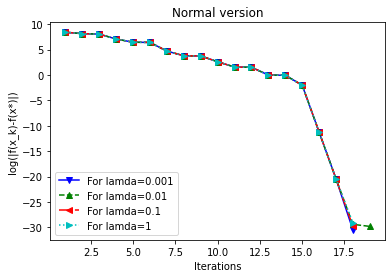

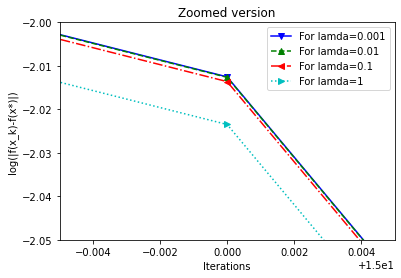

In [19]:
for i in lamda_list:
  plt.plot([k+1 for k in range(no_of_iter_for_lam2[i]-1)], [math.log(abs(evalf(x_k_for_lam2[i][j], i)-evalf(minimizers_for_lam2[i], i))) for j in range(no_of_iter_for_lam2[i]-1)], styl_dict[i])
plt.xlabel('Iterations')
plt.ylabel('log(|f(x_k)-f(x*)|)')
plt.title('Normal version')
plt.legend(['For lamda=0.001','For lamda=0.01','For lamda=0.1','For lamda=1'])

fig, ax = plt.subplots()
for i in lamda_list:
  ax.plot([k+1 for k in range(no_of_iter_for_lam2[i]-1)], [math.log(abs(evalf(x_k_for_lam2[i][j], i)-evalf(minimizers_for_lam2[i], i))) for j in range(no_of_iter_for_lam2[i]-1)], styl_dict[i])

plt.xlim([14.995, 15.005])
plt.ylim([-2.05, -2.0])
plt.xlabel('Iterations')
plt.ylabel('log(|f(x_k)-f(x*)|)')
plt.title('Zoomed version')
plt.legend(['For lamda=0.001','For lamda=0.01','For lamda=0.1','For lamda=1'])

plt.show()

Here, the convergence rate for both is Q-linear as ln(||x_k+1 - x* ||) - ln(x_k- x*) is negative and there exists c in (0,1) for all negative numbers k s.t. ln(c) >= k.

**Q 6**

In [20]:
table = [['lamda','Time Taken for Newton','Time Taken for BFGS']]
for i in lamda_list:
  table.append([i,time_for_lamda1[i],time_for_lamda2[i]])

print(tabulate(table, headers='firstrow'))

  lamda    Time Taken for Newton    Time Taken for BFGS
-------  -----------------------  ---------------------
  0.001               0.0101351               0.0147258
  0.01                0.00483951              0.0133903
  0.1                 0.00514855              0.0128522
  1                   0.00400296              0.0127446


For BFGS increasing lamda the time is decreasing.

Here, Newtons is taking more time as compared to BFGS. And for different lamda The time is not following any proper trend.